In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
from numpy.random import seed, choice
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import *
from imblearn.metrics import specificity_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_text


In [3]:
#Usamos el df del proyecto anterior, 

df = pd.read_csv('/workspaces/LC-Decision-Tree/data/processed/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dividing the dataset into training and test samples

data =df

X = data.drop("Outcome", axis = 1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
446,0,137,84,27,0,27.3,0.231,59
6,3,78,50,32,88,31.0,0.248,26
423,1,82,64,13,95,21.2,0.415,23
596,13,104,72,0,0,31.2,0.465,38
411,1,97,70,15,0,18.2,0.147,21


Step 2: Initialization and training of the model

In [5]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Step 3: Model prediction

In [6]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7931034482758621

Optimización de hiperparámetros


In [8]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, 
    n_iter=20, scoring='accuracy', cv=5, random_state=42, n_jobs=-1
)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores hiperparámetros:", random_search.best_params_)

# Entrenar modelo con mejores parámetros
best_model = XGBClassifier(**random_search.best_params_)
best_model.fit(X_train, y_train)

#Nueva prediccion
y_pred = best_model.predict(X_test)
y_pred
accuracy_score(y_test, y_pred)

Mejores hiperparámetros: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


0.8206896551724138

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       102
           1       0.68      0.74      0.71        43

    accuracy                           0.82       145
   macro avg       0.78      0.80      0.79       145
weighted avg       0.83      0.82      0.82       145



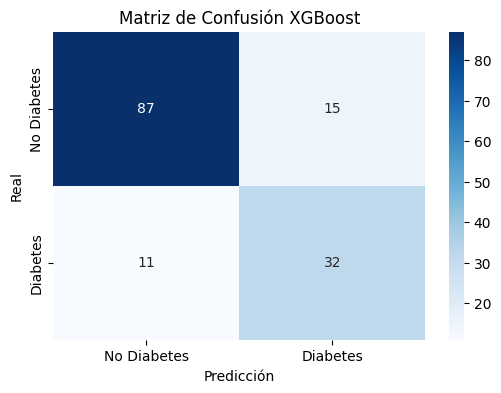

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predicciones
y_pred = best_model.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión XGBoost")
plt.show()

El modelo acierta mas casos en los que el paciente no tiene diabetes,  los casos con diabetes no diagnosticados son 11

In [15]:
from pickle import dump

dump(best_model, open("../models/boosting_maxdepth5_n300_seed42.sav", "wb"))

COMPARASIÓN MODELOS ARBOL DE DESICION, RANDOM FOREST Y BOOSTING

In [1]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Definir rutas de los modelos
model_paths = {
    "Árbol de Decisión": "../models/tree_classifier.sav",
    "Random Forest": "../models/random_forest_maxdepth5_n50_seed42.sav",
    "XGBoost": "../models/boosting_maxdepth5_n300_seed42.sav"
}

# Cargar los modelos
modelos = {nombre: joblib.load(path) for nombre, path in model_paths.items()}

# Cargar los datos de prueba
df = pd.read_csv("../data/processed/diabetes.csv")  
X_test = df.drop("Outcome", axis=1)
y_test = df["Outcome"]

# Función para evaluar modelos
def evaluar_modelo(modelo, X_test, y_test, nombre):
    y_pred = modelo.predict(X_test)
    return {
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    }

# Evaluar todos los modelos
resultados = [evaluar_modelo(modelo, X_test, y_test, nombre) for nombre, modelo in modelos.items()]

# Crear DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

# Ordenar por Accuracy y mostrar la tabla
df_resultados = df_resultados.sort_values(by="Accuracy", ascending=False)
print(df_resultados)

              Modelo  Accuracy  Precision    Recall
1      Random Forest  0.961326   0.940239  0.947791
2            XGBoost  0.885359   0.864035  0.791165
0  Árbol de Decisión  0.803867   0.725738  0.690763


el Modelo que logra un mejor balance es el Random Forest, es decir que clasifica adecuadamente los casos positivos de los negativo, el modelo Bosting tambien es bueno, pero no tiene la exactitud que tiene el Random forest. 